# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Farid Alvin Fadillah


## Menentukan Pertanyaan Bisnis

- Bagaimana penyebaran dan perbandingan customer dan seller di setiap state?
- Apakah ada hubungan antara waktu pengiriman dengan skor review?

## Import Semua Packages/Library yang Digunakan

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

## Data Wrangling

### Gathering Data

mengambil data yang dibutuhkan

mengambil data order review

In [139]:
order_reviews_df = pd.read_csv("data/order_reviews_dataset.csv", delimiter=",")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


mengambil data seller

In [140]:
sellers_df = pd.read_csv("data/sellers_dataset.csv", delimiter=",")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


mengambil data order

In [141]:
orders_df = pd.read_csv("data/orders_dataset.csv", delimiter=",")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


mengambil data customer

In [142]:
customers_df = pd.read_csv("data/customers_dataset.csv", delimiter=",")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


mengambil data payments

In [143]:
payments_df = pd.read_csv("data/order_payments_dataset.csv", delimiter=",")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Assessing Data

melihat informasi dari semua dataframe

In [144]:
print('\n', customers_df.info())
print("===============================================")
print('\n', payments_df.info())
print("===============================================")
print('\n', order_reviews_df.info())
print("===============================================")
print('\n', orders_df.info())
print("===============================================")
print('\n', sellers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 n

cek data yang null

In [145]:
print('\nInfo data null customers:\n', customers_df.isnull().sum())
print('\nInfo data null order payments:\n', payments_df.isnull().sum())
print('\nInfo data null order reviews:\n', order_reviews_df.isnull().sum())
print('\nInfo data null orders:\n', orders_df.isnull().sum())
print('\nInfo data null sellers:\n', sellers_df.isnull().sum())


Info data null customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Info data null order payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Info data null order reviews:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Info data null orders:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Info data null

cek data duplikat

In [146]:
print('\nInfo data duplikat customers:\n', customers_df.duplicated().sum())
print('\nInfo data duplikat order payments:\n', payments_df.duplicated().sum())
print('\nInfo data duplikat order reviews:\n', order_reviews_df.duplicated().sum())
print('\nInfo data duplikat orders:\n', orders_df.duplicated().sum())
print('\nInfo data duplikat sellers:\n', sellers_df.duplicated().sum())


Info data duplikat customers:
 0

Info data duplikat order payments:
 0

Info data duplikat order reviews:
 0

Info data duplikat orders:
 0

Info data duplikat sellers:
 0


cek deskripsi dari dataframe

In [147]:
print('\nInfo data describe customers:\n', customers_df.describe(include='all'))
print('\nInfo data describe order payments:\n', payments_df.describe(include='all'))
print('\nInfo data describe order reviews:\n', order_reviews_df.describe(include='all'))
print('\nInfo data describe orders:\n', orders_df.describe(include='all'))
print('\nInfo data describe sellers:\n', sellers_df.describe(include='all'))


Info data describe customers:
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefi

### Cleaning Data

karena data orders_df dan order_reviews_df memiliki null, maka kita isi null tersebut dengan nilai tertentu
cek dulu review_comment_title yang null

In [148]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [149]:
order_reviews_df.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

cek juga review_comment_message yang null

In [150]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [151]:
order_reviews_df.review_comment_message.value_counts()

review_comment_message
Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                            

mengganti semua review yang null dengan no comment

In [152]:
order_reviews_df.fillna(value="no comment", inplace=True)
print('\nInfo data null order reviews:\n', order_reviews_df.isnull().sum())



Info data null order reviews:
 review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


karena ada order date yang null, maka data tersebut di drop.

In [153]:
orders_df.dropna(subset=['order_delivered_carrier_date', 'order_delivered_customer_date','order_approved_at'], inplace=True)
print('\nInfo data null orders:\n', orders_df.isnull().sum())


Info data null orders:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


mengubah "review_creation_date","review_answer_timestamp" pada order_reviews_dfmenjadi format datetime



In [154]:
datetime_rev = ["review_creation_date","review_answer_timestamp"]

for column in datetime_rev:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])



order_reviews_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


mengubah "order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date" pada orders_df menjadi format datetime

In [155]:
datetime_or = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_or:
  orders_df[column] = pd.to_datetime(orders_df[column])
  orders_df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  object        
 5   order_delivered_carrier_date   96461 non-null  object        
 6   order_delivered_customer_date  96461 non-null  object        
 7   order_estimated_delivery_date  96461 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.6+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype        

## Exploratory Data Analysis (EDA)

### Explore customers_df

melihat sampel dari customers

In [156]:
customers_df.sample(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
45665,0fddfe15afd87240227d687cc9f46b65,fc62ebc813865bf576dd3bde250a3a7a,95360,parai,RS
23641,cd99a4cb6f4d2e8342351bc978460e07,eb295bd972e6d73251348a08a6e18ccd,4046,sao paulo,SP
26117,00c36dc4ec485e2500e9a669d6ea63d6,1973beff39565594011f9a0ef66f923e,78455,lucas do rio verde,MT


melihat informasi dari customers

In [157]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


mencheck apakah ada customer id yang sama

In [158]:
customers_df.customer_id.is_unique

True

In [159]:
duplicated_rows = customers_df[customers_df.customer_id.duplicated()]
duplicated_rows.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,0,0,0.0,0,0
unique,0,0,NaN,0,0
top,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN


melihat semua customer id yang unique di setiap customer city

In [160]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

melihat semua customer id yang unique di setiap customer state

In [161]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

rename customer_state menjadi state

In [162]:
customers_df.rename(columns={'customer_state': 'state'}, inplace=True)
display(customers_df)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


### Explore orders_df


melihat sample orders

In [163]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6594,3253dbc37317420bcb7b0f5aa1c571c1,cb7c2f382492f4ed45a0267ca1da9e35,delivered,2018-01-05 14:14:35,2018-01-06 02:27:51,2018-01-09 22:06:41,2018-01-16 21:19:48,2018-01-30
56527,74e140c90deb93d4414ed8d2829dcfc6,824d5940d4c3aafbe3d8f4d4d071e78a,delivered,2018-05-04 09:08:22,2018-05-04 09:32:23,2018-05-04 14:59:00,2018-05-15 15:22:59,2018-05-24
51887,02c84deb7aa1f2e74090d56a0ec84120,34c059ffa44982e5208d2ced3c986b51,delivered,2018-03-01 22:46:34,2018-03-01 23:09:46,2018-03-02 19:56:54,2018-04-03 00:58:52,2018-03-23
77395,67125a02929ae733f8087641f22c6842,fa8beffef385577583fa4f5ae3a01698,delivered,2017-12-31 11:30:26,2018-01-03 04:16:39,2018-01-03 17:54:03,2018-01-04 19:53:23,2018-01-22
75574,ed0621902f725df643367f63deec991a,12c12ffae8f42f1ced8772ca1c708d51,delivered,2018-03-06 08:28:29,2018-03-06 08:40:30,2018-03-07 17:54:10,2018-03-09 20:12:48,2018-03-22


membuat kolom delivery time yang bersisi waktu (hari) untuk mengantar lalu dibulatkan

In [164]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = round(delivery_time.apply(lambda x: x.total_seconds())/86400,1)
orders_df["delivery_time"] = delivery_time


orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
69430,f37ceab35e76b508f951fd148edead7d,3a67da457160007dc4393d326e9acacc,delivered,2018-02-14 18:35:12,2018-02-14 18:48:02,2018-02-15 18:41:48,2018-02-27 14:55:04,2018-03-09,11.8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.5
19343,2c60a2b23a96f36c97dbe108da3ab34f,bdbb094f82427ae78f54dead5ec46c02,delivered,2018-05-19 21:05:53,2018-05-20 01:02:02,2018-05-23 14:11:00,2018-05-25 14:50:59,2018-06-07,2.0
30473,8ad883016b6266c5cbbface4f5e4ecab,29fbf33d732cdc639a51bcab305ec6a9,delivered,2017-04-20 15:59:14,2017-04-25 21:34:50,2017-04-27 09:18:02,2017-05-04 16:18:49,2017-05-31,7.3
72553,596f8123fe4a804da55175cc9c0a2a12,eead077503efe240789af036e92c1df3,delivered,2017-07-12 23:24:58,2017-07-12 23:35:18,2017-07-13 17:46:55,2017-07-25 20:47:48,2017-08-09,12.1


membuat histogram dari distribusi waktu pengiriman

<Axes: title={'center': 'Distribusi waktu pengiriman'}, xlabel='Waktu (hari)', ylabel='Jumlah Entries'>

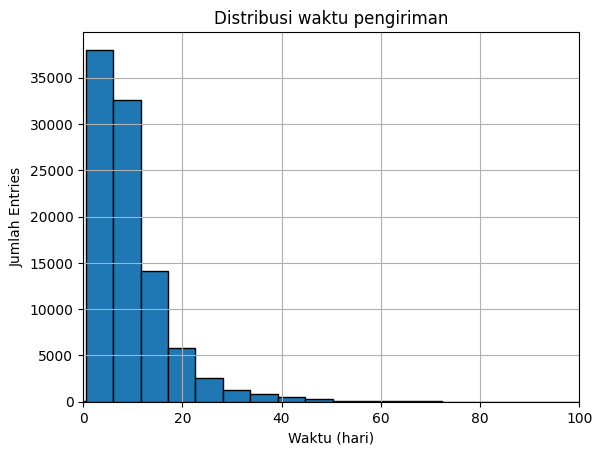

In [165]:
plt.title("Distribusi waktu pengiriman")
plt.xlabel("Waktu (hari)")
plt.ylabel("Jumlah Entries")
plt.xlim(0, 100)
orders_df.delivery_time.hist(bins=40,edgecolor='black')

### Explore payments_df

melihat deskripsi dan sample payments

In [166]:
payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [167]:
payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
82155,210815e915694747f4d7f75010d5a665,1,credit_card,1,31.94
70629,b8996dc39f7c327bc92c7f8bb85dbe21,1,credit_card,3,68.02
43879,7cbb15d12a1bb13fde596f305857b22e,1,credit_card,3,32.38
44237,0e1bd6280d543519379a15614783b9fe,1,credit_card,1,194.22
38926,4a3b3a1333c6468be0917515b6253108,1,boleto,1,68.88


membuat dataframe grouped payment berisi jumlah total pemakaian dari setiap payment type

In [168]:
grouped_payment = payments_df.groupby('payment_type').size().reset_index(name='count')


print(grouped_payment)


  payment_type  count
0       boleto  19784
1  credit_card  76795
2   debit_card   1529
3  not_defined      3
4      voucher   5775


### Explore sellers_df

melihat sampel dan deskripsi dari customers

In [169]:
sellers_df.sample(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1798,73b8eb4a9a729d4019b24ed1be748cbf,13070,campinas,SP
1948,c878515173c84a492ebe50d6b493230b,85880,itaipulandia,PR
145,ffcfefa19b08742c5d315f2791395ee5,80045,curitiba,PR


melihat deskripsi dari sellers

In [170]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


mencheck apakah ada seller id yang sama

In [171]:
sellers_df.seller_id.is_unique

True

In [172]:
duplicated_rows = sellers_df[sellers_df.seller_id.duplicated()]
duplicated_rows.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,0,0.0,0,0
unique,0,NaN,0,0
top,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN


mengubah seller state menjadi state

In [173]:
sellers_df.rename(columns={'seller_state': 'state'}, inplace=True)
sellers_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,state
2022,ae7ab174effdead6c241e547e4ca13f0,86703,arapongas,PR
2848,3f84fefc07dc159b268d4a77d3e8c425,83833,fazenda rio grande,PR
1105,3d4b1ae7539303b5704493798893e82c,3244,sao paulo,SP
2571,b2eecf5ea250510da76590ca79d60e5d,3318,sao paulo,SP
2988,f9eedec3129e8cc6b6429c42d0808c5b,22793,"rio de janeiro, rio de janeiro, brasil",RJ


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana penyebaran dan perbandingan customer dan seller di setiap satate?

membuat dataframe merged_counts yang berisi gabungan dari jumlah customers dan sellers berdasarkan statenya

In [174]:
customers_state_counts = customers_df.groupby('state').customer_id.nunique()
sellers_state_counts = sellers_df.groupby('state').seller_id.nunique()


merged_counts = pd.concat([customers_state_counts, sellers_state_counts], axis=1, keys=['Customers', 'Sellers'])
merged_counts.sample(5)

,Customers,Sellers
state,,
GO,2020,40.0
MS,715,5.0
AC,81,1.0
CE,1336,13.0
MA,747,1.0


membuat stacked bar chart

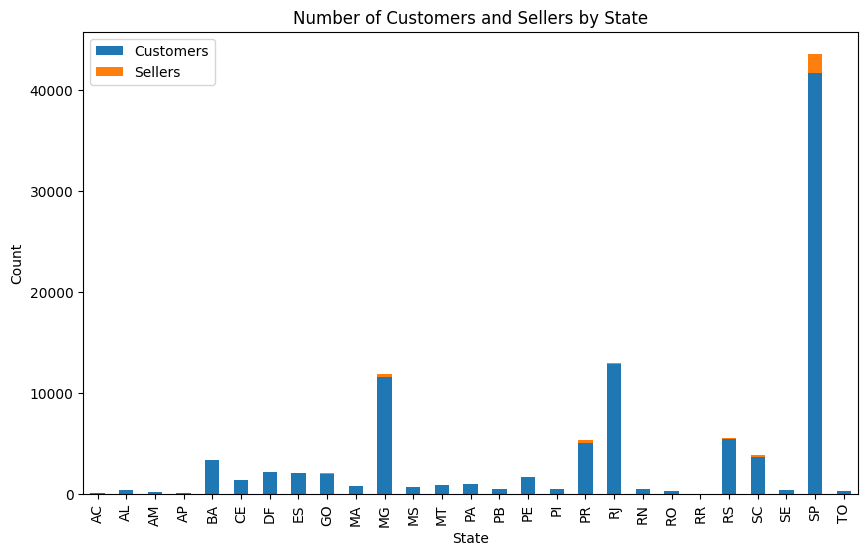

In [175]:
merged_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Customers and Sellers by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

membuat piechart

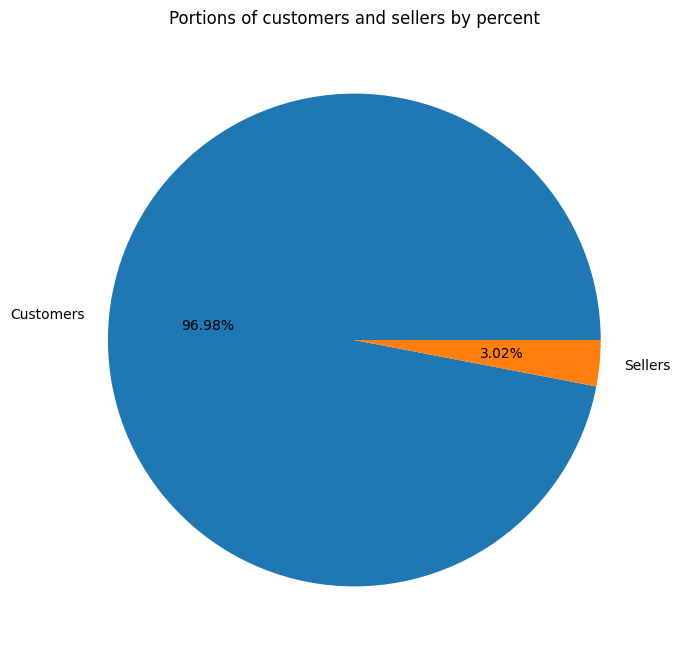

In [176]:
total_customers = merged_counts['Customers'].sum()
total_sellers = merged_counts['Sellers'].sum()

total_counts = pd.Series({'Customers': total_customers, 'Sellers': total_sellers})

# Plotting the pie chart
total_counts.plot.pie(autopct='%1.2f%%', figsize=(8, 8), legend=False)
plt.title('Portions of customers and sellers by percent')
plt.show()

### Pertanyaan 2: Apakah ada hubungan antara waktu pengiriman dengan skor review?

membuat dataframe baru bernama mergerd_df dengan menggabungkan dataframe order dengan review, lalu membuat scatter plot dari waktu pengiriman dengan skor review.

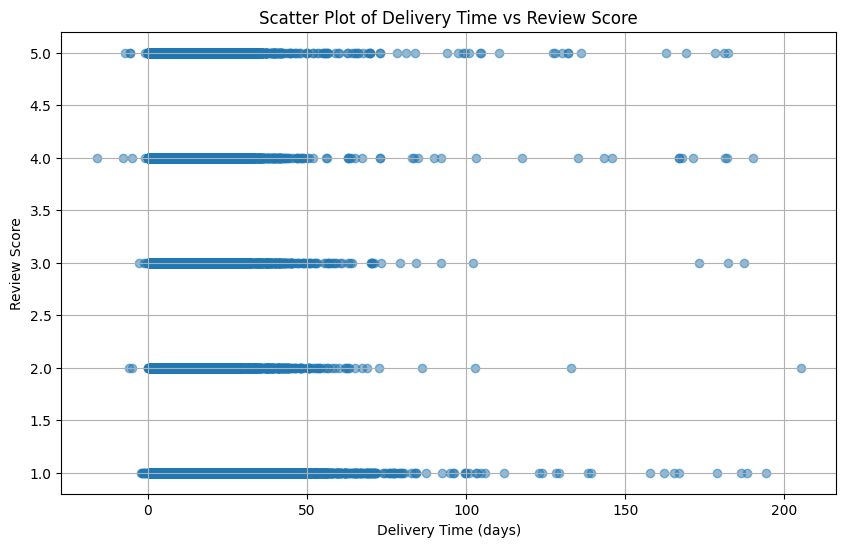

In [177]:
merged_df = pd.merge(orders_df, order_reviews_df, on='order_id')

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['delivery_time'], merged_df['review_score'], alpha=0.5)
plt.title('Scatter Plot of Delivery Time vs Review Score')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Review Score')
plt.grid(True)
plt.show()

membuat box plot 

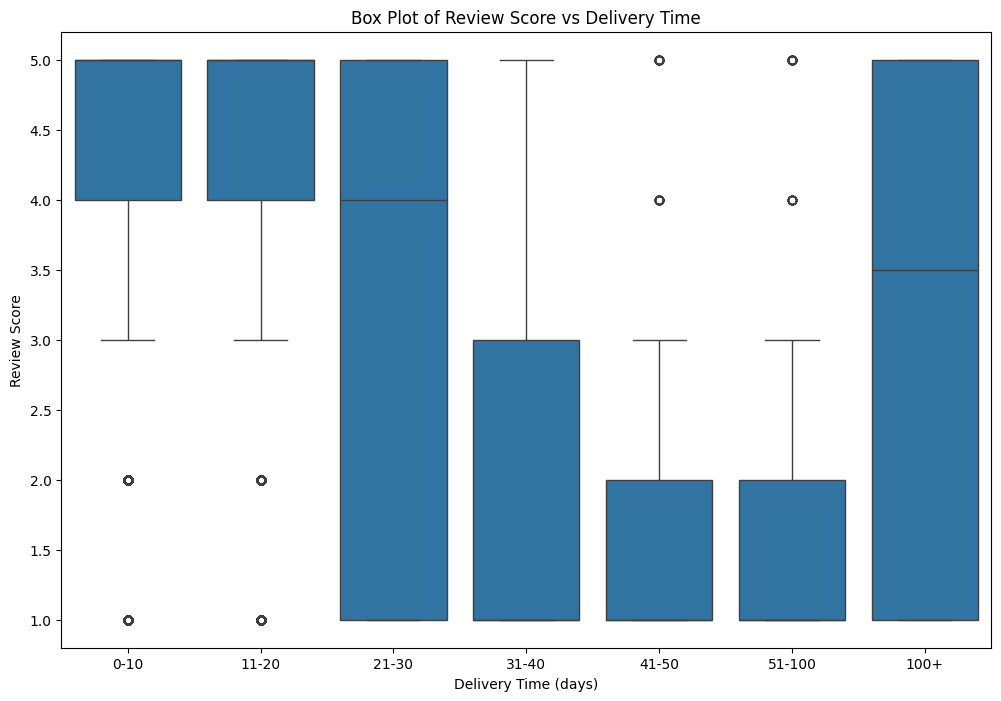

In [178]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=pd.cut(merged_df['delivery_time'], bins=[0, 10, 20, 30, 40, 50, 100, float('inf')], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-100', '100+']), y=merged_df['review_score'])
plt.title('Box Plot of Review Score vs Delivery Time')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Review Score')
plt.show()

membuat violin plot

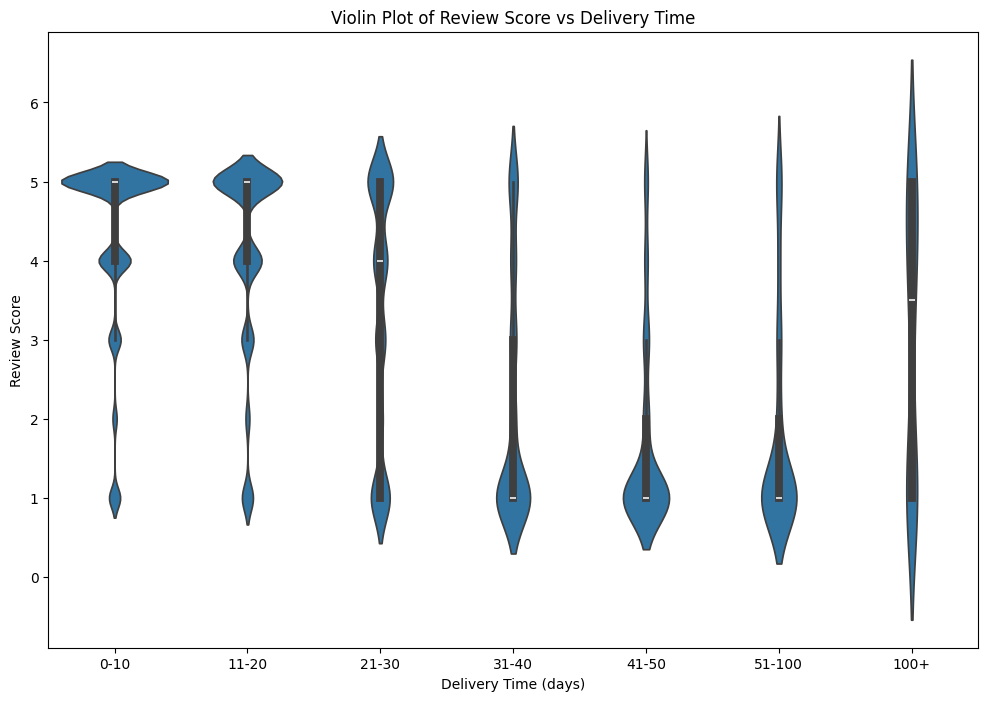

In [179]:
plt.figure(figsize=(12, 8))
sns.violinplot(x=pd.cut(merged_df['delivery_time'], bins=[0, 10, 20, 30, 40, 50, 100, float('inf')], labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-100', '100+']), y=merged_df['review_score'])
plt.title('Violin Plot of Review Score vs Delivery Time')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Review Score')
plt.show()


## Conclusion





- pertanyaan 1: jumlah customers dan sellers terbanyak terdapat pada state SP yang paling dominan dibandingkan dengan state lain. jumlah sellernya juga mencakup 3% dari total jumlah pengguna

- pertanyaan 2: jumlah review 5 cenderung berada pada 20 hari pertama, lalu pada hari ke 21-30 dan 100+ terlihat bahwa skor cenderung berada pada review skor paling tinggi atau paling rendah. sedangkan hari ke 31-100, reviewnya cenderung berada dibawah 2.